## D-shaped tokamk

$$ R = R_0 (1 + \epsilon\cos(\theta+\delta\sin\theta)) $$
$$ \phi = -\varphi $$
$$ Z = R_0 \kappa\epsilon\sin\theta $$

In [1]:
import lec.toroidalField
import lec.geometry

import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

In [2]:
r0 = 1                  # major radius
epsilon = 0.3 * r0      # aspect ratio
kappa = 2               # elongation
delta = 0.5             # triangularity

funR = lambda theta: r0 * (1 + epsilon * np.cos(theta+delta*np.sin(theta)))
funZ = lambda theta: r0 * kappa * epsilon *np.sin(theta) 

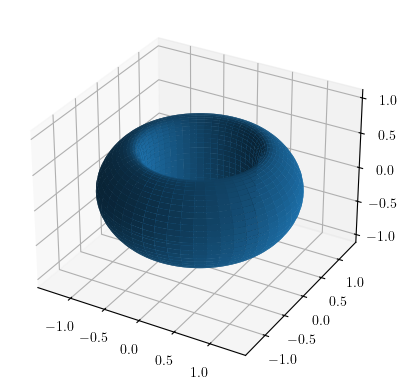

In [3]:
_thetaArr = np.linspace(0, 2*np.pi, 100)
_zetaArr = np.linspace(0, 2*np.pi, 200)
thetaArr, zetaArr = np.meshgrid(_thetaArr, _zetaArr)
rArr = funR(thetaArr)
xArr = rArr * np.cos(zetaArr)
yArr = rArr * np.sin(zetaArr)
zArr = funZ(thetaArr)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(xArr, yArr, zArr)
_ = plt.axis("equal")

In [4]:
nfp = 1
sampleNumsTheta, sampleNumsPhi = 5, 1
deltaTheta = 2*np.pi / (2*sampleNumsTheta+1)
deltaVarPhi = 2*np.pi / nfp / (2*sampleNumsPhi+1)
sampleTheta, sampleVarPhi = np.arange(2*sampleNumsTheta+1)*deltaTheta, np.arange(2*sampleNumsPhi+1)*deltaVarPhi
gridSampleVarPhi, gridSampleTheta = np.meshgrid(sampleVarPhi, sampleTheta)
sampleR = funR(gridSampleTheta)
sampleZ = funZ(gridSampleTheta)

fieldR = lec.toroidalField.fftToroidalField(sampleR, nfp=nfp)
fieldZ = lec.toroidalField.fftToroidalField(sampleZ, nfp=nfp)

surfTokamak = lec.geometry.Surface(fieldR, fieldZ)

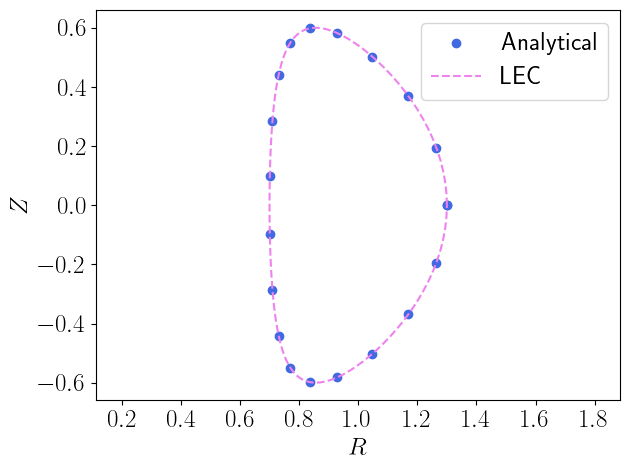

In [5]:
fig, ax = plt.subplots()
ax.scatter(funR(np.linspace(0, 2*np.pi, 20)), funZ(np.linspace(0, 2*np.pi, 20)), c = "royalblue", label="Analytical")
ax.plot(
    surfTokamak.r.getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    surfTokamak.z.getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "LEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$R$", fontsize=18)
ax.set_ylabel(r"$Z$", fontsize=18)
_, _ = plt.xticks(fontsize=18), plt.yticks(fontsize=18)
_ = plt.axis("equal")
fig.tight_layout()

$$ g_{\theta\theta} = 
\left(\frac{\partial R}{\partial \theta}\right)^2 + \left(\frac{\partial Z}{\partial \theta}\right)^2 
= R_0^2\epsilon^2 (\kappa^2\cos^2\theta + \sin^2(\theta+\delta\sin\theta)(1+\delta\cos\theta)^2)
$$

In [6]:
def funGthetatheta(thetaArr: np.ndarray) -> np.ndarray:
    return r0*r0 * epsilon*epsilon * (
        kappa*kappa*np.power(np.cos(thetaArr),2) + 
        np.power(np.sin(thetaArr+delta*np.sin(thetaArr)), 2) * np.power(1+delta*np.cos(thetaArr), 2)
    )

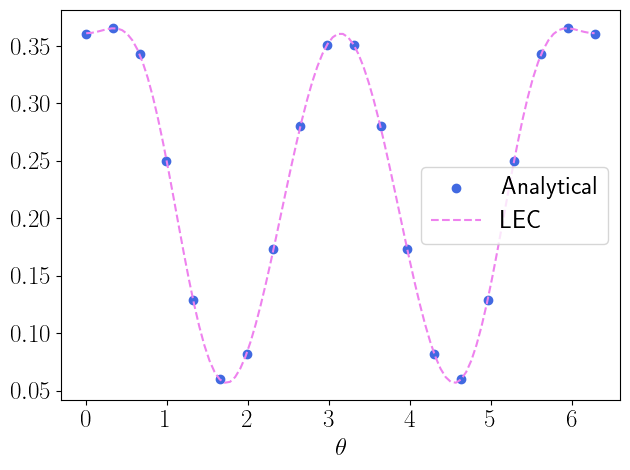

In [7]:
fig, ax = plt.subplots()
ax.scatter(np.linspace(0, 2*np.pi, 20), funGthetatheta(np.linspace(0, 2*np.pi, 20)), c = "royalblue", label="Analytical")
ax.plot(
    np.linspace(0,2*np.pi,100), 
    surfTokamak.mertic[0].getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "LEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\theta$", fontsize=18)
_, _ = plt.xticks(fontsize=18), plt.yticks(fontsize=18)
fig.tight_layout()

$$ g_{\theta\varphi} = 0 $$

In [8]:
def funGthetaphi(thetaArr: np.ndarray) -> np.ndarray:
    return np.zeros(thetaArr.shape)

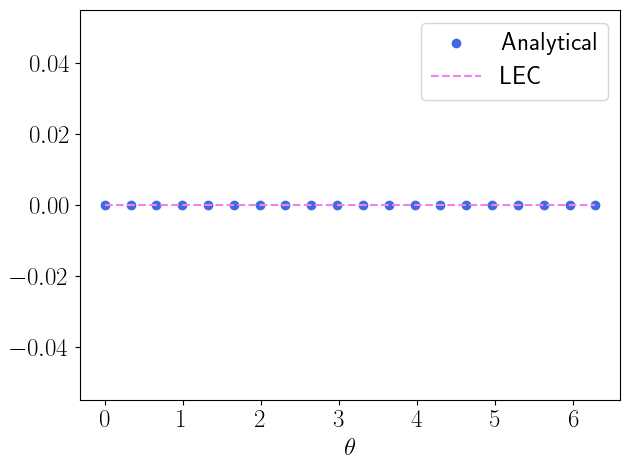

In [9]:
fig, ax = plt.subplots()
ax.scatter(np.linspace(0, 2*np.pi, 20), funGthetaphi(np.linspace(0, 2*np.pi, 20)), c = "royalblue", label="Analytical")
ax.plot(
    np.linspace(0,2*np.pi,100), 
    surfTokamak.mertic[1].getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "LEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\theta$", fontsize=18)
_, _ = plt.xticks(fontsize=18), plt.yticks(fontsize=18)
fig.tight_layout()

$$ g_{\varphi\varphi} = R^2 $$

In [10]:
def funGphiphi(thetaArr: np.ndarray) -> np.ndarray:
    return np.power(funR(thetaArr), 2)

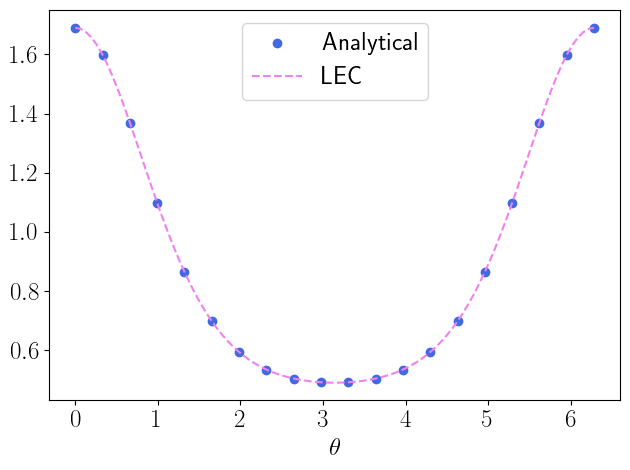

In [11]:
fig, ax = plt.subplots()
ax.scatter(np.linspace(0, 2*np.pi, 20), funGphiphi(np.linspace(0, 2*np.pi, 20)), c = "royalblue", label="Analytical")
ax.plot(
    np.linspace(0,2*np.pi,100), 
    surfTokamak.mertic[2].getValue(np.linspace(0,2*np.pi,100),np.zeros(100)).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "LEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\theta$", fontsize=18)
_, _ = plt.xticks(fontsize=18), plt.yticks(fontsize=18)
fig.tight_layout()